<a href="https://colab.research.google.com/github/curiasuncc/4105-Intro-To-ML/blob/main/Hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
#training set 436 values (80%)
df = pd.read_csv('/content/Housing.csv',nrows=436)
df.head() # To get first n rows from the dataset default value of n is 5 
TRAIN=len(df) 
print(TRAIN) 
#evaluation set 109 values (20%)
dg = pd.read_csv('/content/Housing.csv',skiprows=436)
dg.head()
EVAL=len(dg)
print(EVAL)

436
109


In [ ]:
#from pickle import EXT2
T1 = df.values[:, 1]  # get training input values from 2nd column,area 
T2 = df.values[:, 2]  # get training input values from 3rd column,bedrooms 
T3 = df.values[:, 3]  # get training input values from 4th column,bathrooms 
T4 = df.values[:, 4]  # get training input values from 5th column,stories 
T9 = df.values[:, 10]  # get training input values from 10th column,parking
E1 = dg.values[:, 1]   # get evaluation input values from 2nd column,area
E2 = dg.values[:, 2]  # get evaluation input values from 2nd column,area
E3 = dg.values[:, 3]  # get evaluation input values from 2nd column,area
E4 = dg.values[:, 4]  # get evaluation input values from 2nd column,area
E9 = dg.values[:, 10] # get evaluation input values from 2nd column,area
#X=X1+X2+X3+X4+X5
#print(X.shape)         
y = df.values[:, 0]  # get training output values from 1st column.house price 
yy = dg.values[:, 0]  # get evaluation output values from 1st column.house price
m = len(y) # Number of training examples 
mm= len(yy) # Number of evaluation examples 
print('X = ', X1[: 5]) # Show only first 5 records 
print('y = ', y[: 5]) 
print('m = ', m) 
print('mm = ', mm) 

X =  [7420 8960 9960 7500 7420]
y =  [13300000 12250000 12250000 12215000 11410000]
m =  436
mm =  109


In [ ]:

#X = df.values[:, 0]  # get input values from first column 
#y = df.values[:, 1]  # get output values from second column 
#m = len(y) # Number of training examples 
#print('X = ', X[: 97]) # Show only first 5 records 
#print('y = ', y[: 97]) 
#print('m = ', m) 

Text(0.5, 1.0, 'Scatter plot of training data')

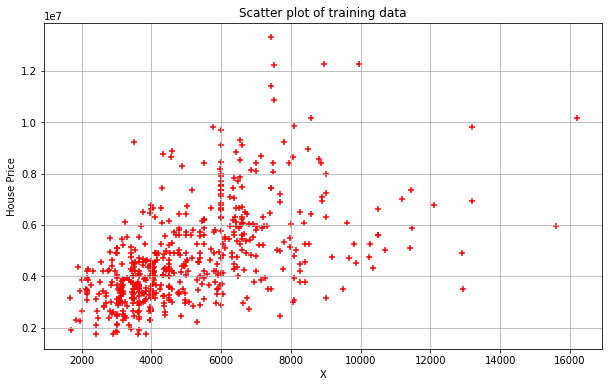

In [ ]:
plt.scatter(X1,y, color='red',marker= '+') 
plt.grid() 
plt.rcParams["figure.figsize"] = (10,6) 
plt.xlabel('X') 
plt.ylabel('House Price') 
plt.title('Scatter plot of training data') 

In [ ]:
#Lets create a matrix with single column of ones 
T_0 = np.ones((m, 1)) 
#T_0[:5] 
E_0 = np.ones((mm, 1)) 
#E_0[:5] 

In [ ]:
# Using reshape function convert X 1D array to 2D array of dimension mx1 
T_1 = T1.reshape(m, 1) 
T_2 = T2.reshape(m, 1)
T_3 = T3.reshape(m, 1)
T_4 = T4.reshape(m, 1)
T_9 = T9.reshape(m, 1)
#T_1[:10] 
E_1 = E1.reshape(mm, 1) 
E_2 = E2.reshape(mm, 1)
E_3 = E3.reshape(mm, 1)
E_4 = E4.reshape(mm, 1)
E_9 = E9.reshape(mm, 1)
#E_1[:10]

array([[2145],
       [5880],
       [4500],
       [3930],
       [3640],
       [4370],
       [2684],
       [4320],
       [3120],
       [3450]], dtype=object)

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column 
# This will be our final X matrix (feature matrix) 
X = np.hstack((T_0, T_1, T_2, T_3, T_4, T_9)) 
XX = np.hstack((E_0, E_1, E_2, E_3, E_4, E_9))
XX[:5] 

array([[1.0, 2145, 3, 1, 2, 0],
       [1.0, 5880, 3, 1, 1, 1],
       [1.0, 4500, 2, 1, 1, 0],
       [1.0, 3930, 2, 1, 1, 0],
       [1.0, 3640, 4, 1, 2, 0]], dtype=object)

In [ ]:
thetaT = np.zeros(6)  #train thetas 
thetaE = np.zeros(6)  #eval thetas 
#theta 

array([0., 0., 0., 0., 0., 0.])

In [ ]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [ ]:

# Lets compute the cost for theta values 
costT = compute_cost(X, y, thetaT) #train cost
costE = compute_cost(X, y, thetaE) #eval cost
print('The cost for given values of theta =', costT) 

The cost for given values of theta_0 and theta_1 = 13106916364659.268


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) 
  """ 
  cost_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history 

In [ ]:
theta = [0., 0., 0., 0., 0., 0.] 
iterations = 1500;  #1500
alpha = 0.01; 

In [ ]:
thetaT, cost_history = gradient_descent(X, y, thetaT, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


Final value of theta = [nan nan nan nan nan nan]
cost_history = [1.11504603e+24 1.08743937e+35 1.06051620e+46 ...            nan
            nan            nan]


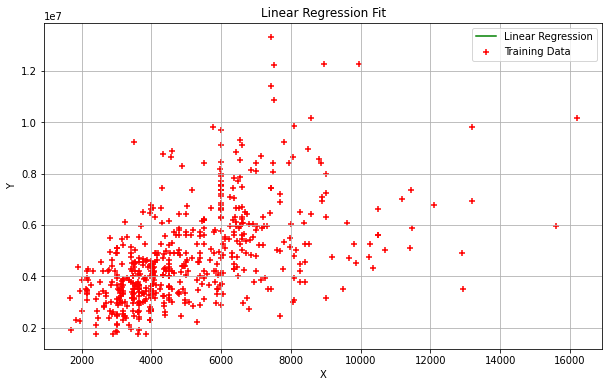

In [ ]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only 
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('Linear Regression Fit') 
plt.legend() 

Text(0.5, 1.0, 'Convergence of gradient descent')

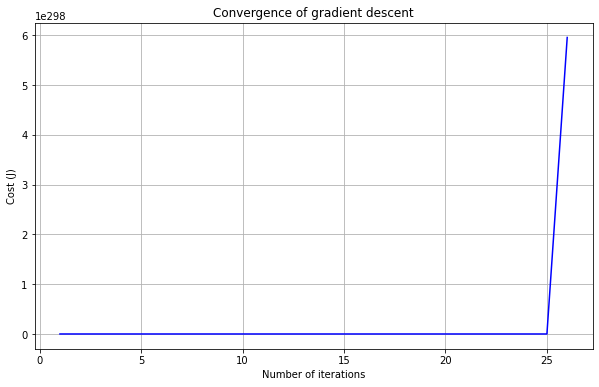

In [ ]:
plt.plot(range(1, iterations + 1),cost_history, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 